In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


Load dữ liệu từ MNIST dataset, bao gồm 60.000 training set và 10.000 test set. Sau đó chia bộ traning set thành 2: 50.000 cho training set và 10.000 dữ liệu cho validation set.

In [16]:
# 2. Load dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
x_val, y_val = x_train[50000:], y_train[50000:]
x_train, y_train = x_train[:50000], y_train[:50000]
print(x_train.shape)

(60000, 28, 28)
(50000, 28, 28)


Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training. Do dữ liệu ảnh ở trên có kích thước là (N, 28, 28) tức là (N, W, H) nên rần reshape lại thành kích thước N 28 28 * 1 để giống kích thước mà keras yêu cầu.

In [17]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Bước này chuyển đổi one-hot encoding label Y của ảnh ví dụ số 5 thành vector [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [18]:
# 4. One hot encoding label (Y)
print("Du lieu y ban dau:", y_train[0])
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
y_test = np_utils.to_categorical(y_test, 10)
print("Du lieu y sau khi one-hot encoding", y_train[0])

('Du lieu y ban dau:', 5)
('Du lieu y sau khi one-hot encoding', array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))



Bước này định nghĩa model:

1. Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
2. Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D), ta dùng ảnh xám kích thước (28,28) nên input_shape = (28, 28, 1)
3. Khi thêm Convolutional Layer ta cần chỉ rõ các tham số: K (số lượng layer), kernel size (W, H), hàm activation sử dụng. cấu trúc: model.add(Conv2D(K, (W, H), activation='tên_hàm_activation'))
4. Khi thêm Maxpooling Layer cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H)))
5. Bước Flatten chuyển từ tensor sang vector chỉ cần thêm flatten layer.
6. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số_lượng_node activation='tên_hàm activation'))

In [37]:
model = Sequential()
'''
model.add(Conv2D(32,(3,3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
'''
model.add(Conv2D(32,(3,3), activation='sigmoid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(64,(3,3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=32, epochs=10, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 25s 500us/step - loss: 0.3355 - accuracy: 0.9026 - val_loss: 0.0856 - val_accuracy: 0.9764
Epoch 2/10
50000/50000 [==============================] - 28s 555us/step - loss: 0.0700 - accuracy: 0.9799 - val_loss: 0.0543 - val_accuracy: 0.9846
Epoch 3/10
50000/50000 [==============================] - 28s 566us/step - loss: 0.0482 - accuracy: 0.9859 - val_loss: 0.0481 - val_accuracy: 0.9856
Epoch 4/10
50000/50000 [==============================] - 28s 555us/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 5/10
50000/50000 [==============================] - 28s 555us/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0399 - val_accuracy: 0.9882
Epoch 6/10
50000/50000 [==============================] - 29s 588us/step - loss: 0.0213 - accuracy: 0.9939 - val_loss: 0.0378 - val_accuracy: 0.9879
Epoch 7/10
50000/50000 [==============================] 

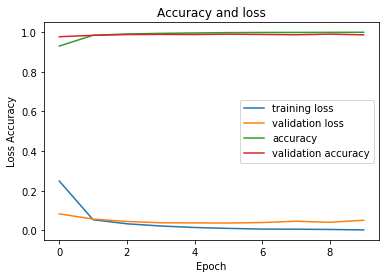

In [31]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0,numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0,numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0,numOfEpoch), H.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Accuracy')
plt.legend()

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.040129334129918426, 0.9878000020980835]

('Gia tri du doan la: ', 7)


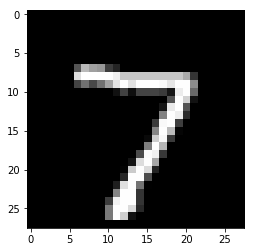

In [36]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(x_test[0].reshape(1,28,28,1))
print('Gia tri du doan la: ', np.argmax(y_predict))